# Stock Market Prediction

# Importing relevant libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import sklearn.metrics as metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Load the data

In [43]:
data= pd.read_csv('NFLX.csv')

In [44]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [45]:
data.shape

(1009, 7)

In [46]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [47]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [48]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [49]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Data Visualisation and Analysis

In [50]:
#data.index= data['Date']

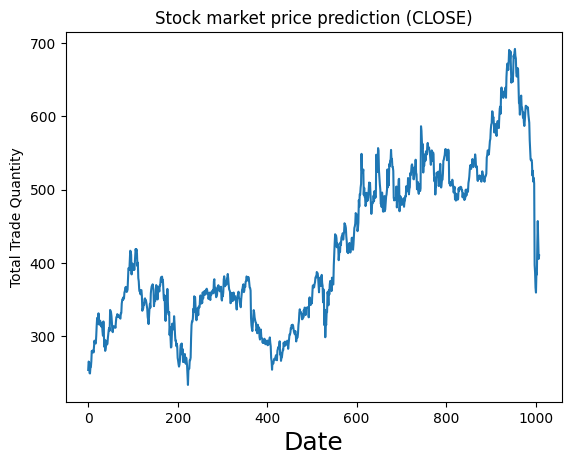

In [51]:
plt.plot(data['Close'])
plt.title('Stock market price prediction (CLOSE)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity')
plt.show()

In [52]:
max_value= data['High'].max()

In [53]:
max_value

700.98999

In [54]:
min_value= data['Low'].min()

In [55]:
min_value

231.229996

# Data Preprocessing

In [56]:
#Converting int64 dtype to datetime64

In [57]:
data['Date']= pd.to_datetime(data['Date'])

In [58]:
data['Date']

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [59]:
#Sorting the dateset according to the date

In [60]:
data= data.sort_values(by="Date")

In [61]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [62]:
#making index in order

In [63]:
data.reset_index(inplace=True)

In [64]:
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [65]:
data.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
1004,1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


# Feature Scaling

In [66]:
df= data['Close']
scaler= MinMaxScaler(feature_range=(-1,1))

In [67]:
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [68]:
df

array([[-0.91096748],
       [-0.86090301],
       [-0.86597063],
       ...,
       [-0.14549701],
       [-0.24981978],
       [-0.22985514]])

# Splitting the data into train and test sets

In [69]:
train_size = int(len(df)*0.80)
test_size = len(df) - train_size
train_data = df[0:train_size,:]
test_data = df[train_size:len(df), :1]

In [70]:
train_size, test_size

(807, 202)

In [71]:
#converting an array of values into a dataset matrix
def datasetCnvrtd(dataset, time_step=1):
  x_data, y_data = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    x_data.append(a)
    y_data.append(dataset[i + time_step, 0])

  return np.array(x_data), np.array(y_data)


In [72]:
time_step = 100
x_train, y_train = datasetCnvrtd(train_data, time_step)
x_test, y_test = datasetCnvrtd(test_data, time_step)

In [73]:
print(x_train.shape)

(706, 100)


In [74]:
print(y_train.shape)

(706,)


In [75]:
#Reshaping input which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

#Building the model

In [76]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.fit(x_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
10/10 [==============================] - 10s 424ms/step - loss: 0.0821 - val_loss: 0.0444
Epoch 2/60
10/10 [==============================] - 2s 164ms/step - loss: 0.0225 - val_loss: 0.0161
Epoch 3/60
10/10 [==============================] - 2s 169ms/step - loss: 0.0151 - val_loss: 0.0105
Epoch 4/60
10/10 [==============================] - 2s 164ms/step - loss: 0.0133 - val_loss: 0.0137
Epoch 5/60
10/10 [==============================] - 2s 173ms/step - loss: 0.0120 - val_loss: 0.0105
Epoch 6/60
10/10 [==============================] - 2s 165ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 7/60
10/10 [==============================] - 2s 195ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 8/60
10/10 [==============================] - 2s 246ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 9/60
10/10 [==============================] - 2s 167ms/step - loss: 0.0097 - val_loss: 0.0102
Epoch 10/60
10/10 [==============================] - 2s 172ms/step - loss: 0.0095 - val_loss: 0.010

In [78]:
test_predict = model.predict(x_test)

4/4 [==============================] - 1s 37ms/step


In [79]:
test_predict1 = scaler.inverse_transform(test_predict)

In [80]:
test_predict1

array([[556.7076 ],
       [551.6414 ],
       [543.8523 ],
       [536.292  ],
       [531.3105 ],
       [529.7498 ],
       [528.90314],
       [527.9879 ],
       [529.5614 ],
       [533.095  ],
       [536.90204],
       [539.80054],
       [540.11383],
       [540.3688 ],
       [542.2069 ],
       [545.0821 ],
       [546.5489 ],
       [550.0371 ],
       [554.7459 ],
       [558.0861 ],
       [559.29736],
       [557.84247],
       [554.3278 ],
       [550.53296],
       [547.8223 ],
       [545.76904],
       [545.44885],
       [546.4442 ],
       [546.4051 ],
       [548.3903 ],
       [552.74866],
       [558.3123 ],
       [562.85364],
       [564.77966],
       [565.2101 ],
       [565.9549 ],
       [565.8816 ],
       [564.5234 ],
       [563.1522 ],
       [560.1379 ],
       [554.015  ],
       [547.11957],
       [541.77606],
       [537.9904 ],
       [537.2234 ],
       [541.3786 ],
       [547.8205 ],
       [554.9461 ],
       [561.30023],
       [564.90936],


#Model Evaluation

In [81]:
#Checking the accuracy using mean squared error

In [82]:
mse=mean_squared_error(y_test, test_predict)
print(mse)

0.1263033459360806
